# NOTEBOOK 5: CLASSIFICATION 
### Team 3
- Anjali Sebastian
- Yesha Sharma
- Rupansh Phutela

### What this Notebook does?
After Data selection, cleaning, pre-processing, EDA and Regression Analysis & Clustering we will now look at how we can perform classfication on our data. Our data has target varibale y = Diabetes (Yes or No) we will try to classify the data to see the performance of different classifiers. 
 - Normalization of entire dataset due to varying ranges of different attributes
 - Simple Visualization of the Dataset

#### CLASSIFICATION Algorithms
 - Gaussian Naive Bayes
 - Neural Networks(MLP)
 - Support Vector Machine
 
#### Naive Bayes
We first try the Gaussian Naive Bayes algorithm. Since we have 21 features, we first need to find important features with the help of importances parameter of the Decision Tree
- Perform PCA on important features and reduce it to suitable dimensions
- Handle imbalanced dataset with sampling
- Perform Gaussian Naive Bayes classification 
- Change hyper parameters of Gaussian Naive Bayes and classify

## 1. Import Packages and Setup

In [1]:
# you need   Python ≥3.5 
import sys
assert sys.version_info >= (3, 5)


In [2]:
# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

In [3]:
import os
import pandas as pd   
import numpy as np    
import seaborn as sns
import time
import warnings
warnings.filterwarnings("ignore")
##############################################

In [4]:
# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "clustering_kmeans"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

# method to save figures
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)


## 2. Utility Functions

In [5]:
import matplotlib.patches as mpatches
from matplotlib.colors import ListedColormap, BoundaryNorm

def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_labelled_scatter(X, y, class_labels):
    num_labels = len(class_labels)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    marker_array = ['o', '^', '*']
    color_array = ['#FFFF00','#00AAFF','#000000','#FF00AA','#2ca02c', '#d62728','#9467bd','#8c564b','#e377c2']
    cmap_bold = ListedColormap(color_array)
    bnorm = BoundaryNorm(np.arange(0, num_labels + 1, 1), ncolors=num_labels)
    plt.figure()

    plt.scatter(X[:, 0], X[:, 1], s=65, c=y, cmap=cmap_bold, norm = bnorm, alpha = 0.40, edgecolor='black', lw = 1)

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    h = []
    for c in range(0, num_labels):
        h.append(mpatches.Patch(color=color_array[c], label=class_labels[c]))
    plt.legend(handles=h)
    plt.show()

In [6]:
# a function to plot a bar graph of important features
def plot_feature_importances(clf, feature_names):
    c_features = len(feature_names)
    #plt.figure(figsize=(15,4))
    plt.figure(figsize=(8,8))
    plt.barh(range(c_features), clf.feature_importances_)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature name")
    plt.yticks(np.arange(c_features), feature_names)

# CHANGE ME FOR DIABETES

In [7]:
import numpy
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap, BoundaryNorm
from sklearn import neighbors
import matplotlib.patches as mpatches
import graphviz
from sklearn.tree import export_graphviz
import matplotlib.patches as mpatches


def plot_class_regions_for_classifier(clf, X, y, X_test=None, y_test=None, title=None, target_names = None, plot_decision_regions = True):

    numClasses = numpy.amax(y) + 1
    color_list_light = ['#FFFFAA', '#EFEFEF', '#AAFFAA', '#AAAAFF']
    color_list_bold = ['#EEEE00', '#000000', '#00CC00', '#0000CC']
    print(color_list_light[0:numClasses])
    cmap_light = ListedColormap(color_list_light[0:numClasses])
    cmap_bold  = ListedColormap(color_list_bold[0:numClasses])

    h = 0.03
    k = 0.5
    x_plot_adjust = 0.1
    y_plot_adjust = 0.1
    plot_symbol_size = 50

    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()

    x2, y2 = numpy.meshgrid(numpy.arange(x_min-k, x_max+k, h), numpy.arange(y_min-k, y_max+k, h))
    # numpy.c_ Translates slice objects to concatenation along the second axis
    # e.g. np.c_[np.array([[1,2,3]]), 0, 0, np.array([[4,5,6]])]
    # ravel() Returns a contiguous flattened array.
    # x = np.array([[1, 2, 3], [4, 5, 6]])
    # np.ravel(x) = [1 2 3 4 5 6]
    P = clf.predict(numpy.c_[x2.ravel(), y2.ravel()])
    P = P.reshape(x2.shape)
    
    #contour region
    plt.figure()
    if plot_decision_regions:
        plt.contourf(x2, y2, P, cmap=cmap_light, alpha = 0.8)
    
    #train data plot
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, s=plot_symbol_size, edgecolor = 'black')
    plt.xlim(x_min - x_plot_adjust, x_max + x_plot_adjust)
    plt.ylim(y_min - y_plot_adjust, y_max + y_plot_adjust)
    
    #test data
    if (X_test is not None):
        plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold, s=plot_symbol_size, marker='^', edgecolor = 'black')
        train_score = clf.score(X, y)
        test_score  = clf.score(X_test, y_test)
        title = title + "\nTrain score = {:.2f}, Test score = {:.2f}".format(train_score, test_score)
    
    
    if (target_names is not None):
        legend_handles = []
        for i in range(0, len(target_names)):
            patch = mpatches.Patch(color=color_list_bold[i], label=target_names[i])
            legend_handles.append(patch)
        plt.legend(loc=0, handles=legend_handles)

    if (title is not None):
        plt.title(title)
    plt.show()



In [8]:
# Show confusion matrix
def plot_confusion_matrix(confusion_mat, cln):
    plt.imshow(confusion_mat, interpolation='nearest', cmap=plt.cm.gray)
    plt.title('Confusion matrix')
    plt.colorbar()
    tick_marks = np.arange(cln)
    plt.xticks(tick_marks, tick_marks)
    plt.yticks(tick_marks, tick_marks)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

## 3. Read Data and Display

In [9]:
diabetes = pd.read_csv('./diabetes.csv')

In [10]:
diabetes.head()

,Unnamed: 0,Diabetes,BMI,State,HighBP,HighChol,CholCheck,FruitConsume,VegetableConsume,Smoker,...,NoDoctorDueToCost,PhysicalActivity,GeneralHealth,PhysicalHealth,MentalHealth,DifficultyWalking,Gender,Age,Education,Income
0,0,0.0,28.17,AL,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,3.0,15.0,0.0,1.0,0.0,13.0,3.0,3.0
1,1,0.0,18.54,AL,0.0,0.0,1.0,1.0,1.0,0.0,...,0.0,1.0,2.0,10.0,0.0,0.0,0.0,11.0,5.0,5.0
2,2,1.0,31.62,AL,1.0,0.0,1.0,1.0,1.0,0.0,...,0.0,1.0,3.0,0.0,30.0,1.0,0.0,10.0,6.0,7.0
3,6,1.0,32.98,AL,0.0,0.0,1.0,1.0,1.0,1.0,...,0.0,1.0,4.0,30.0,0.0,1.0,1.0,11.0,6.0,7.0
4,9,1.0,16.65,AL,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,20.0,0.0,1.0,0.0,11.0,2.0,3.0


In [11]:
#set datatypes of columns to boolean or categorical as appropriate
make_bool_int = ['Diabetes','HighBP','HighChol','CholCheck',\
             'FruitConsume','VegetableConsume','Smoker','HeavyDrinker','Stroke','HeartDisease',\
             'Healthcare','NoDoctorDueToCost','PhysicalActivity','DifficultyWalking','Gender']
make_categorical_int = ['GeneralHealth','Age','Education','Income']

In [12]:
#drop the extra index column in datafram
diabetes=diabetes.drop(['Unnamed: 0'], axis=1)

#drop the state column in dataframe since it will not be used in the dataframe
diabetes=diabetes.drop(['State'], axis=1)

In [13]:
diabetes.head()

,Diabetes,BMI,HighBP,HighChol,CholCheck,FruitConsume,VegetableConsume,Smoker,HeavyDrinker,Stroke,...,NoDoctorDueToCost,PhysicalActivity,GeneralHealth,PhysicalHealth,MentalHealth,DifficultyWalking,Gender,Age,Education,Income
0,0.0,28.17,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,3.0,15.0,0.0,1.0,0.0,13.0,3.0,3.0
1,0.0,18.54,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,2.0,10.0,0.0,0.0,0.0,11.0,5.0,5.0
2,1.0,31.62,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,3.0,0.0,30.0,1.0,0.0,10.0,6.0,7.0
3,1.0,32.98,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0.0,1.0,4.0,30.0,0.0,1.0,1.0,11.0,6.0,7.0
4,1.0,16.65,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,20.0,0.0,1.0,0.0,11.0,2.0,3.0


In [14]:
# deep copy before next stage
df = diabetes.copy(deep = True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243317 entries, 0 to 243316
Data columns (total 22 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Diabetes           243317 non-null  float64
 1   BMI                243317 non-null  float64
 2   HighBP             243317 non-null  float64
 3   HighChol           243317 non-null  float64
 4   CholCheck          243317 non-null  float64
 5   FruitConsume       243317 non-null  float64
 6   VegetableConsume   243317 non-null  float64
 7   Smoker             243317 non-null  float64
 8   HeavyDrinker       243317 non-null  float64
 9   Stroke             243317 non-null  float64
 10  HeartDisease       243317 non-null  float64
 11  Healthcare         243317 non-null  float64
 12  NoDoctorDueToCost  243317 non-null  float64
 13  PhysicalActivity   243317 non-null  float64
 14  GeneralHealth      243317 non-null  float64
 15  PhysicalHealth     243317 non-null  float64
 16  Me

In [16]:
df.shape

(243317, 22)

## 4. Normalization and Simple Vizualization

In [17]:
X_columns = ['BMI', 'HighBP', 'HighChol', 'CholCheck', 'FruitConsume',
       'VegetableConsume', 'Smoker', 'HeavyDrinker', 'Stroke', 'HeartDisease',
       'Healthcare', 'NoDoctorDueToCost', 'PhysicalActivity', 'GeneralHealth',
       'PhysicalHealth', 'MentalHealth', 'DifficultyWalking', 'Gender', 'Age',
       'Education', 'Income']

Note: The entire data set is 0.24 million enteries. The agglomerative clustering and Mean Shift clustering algorithms we causing the kernal to crash because the sized of data set is too large. So we are going to take a random sample of 10,000 entries to perform clustering and see how all the clustering algorithmns perform.

In [18]:
# Selecting a random sample for the data set

#sampling a random number of values since plotting all 0.2 million datapoints will crash the kernal
number_of_samples = 10000
df_sample = df.sample(number_of_samples, random_state=42)

Text(0.5, 1.0, 'Vizualizing the full data (attributes BMI, HighBP). Not Normalized')

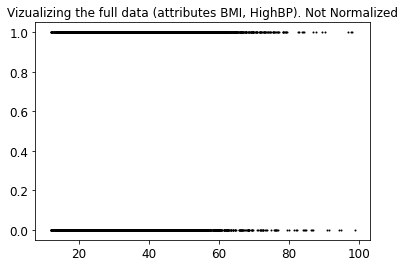

In [19]:
# separating the target column y = Diabetes before clustering
# for complete dataset
X_df = df[X_columns].values
y_df = df[['Diabetes']]
plot_data(X_df)
plt.title("Vizualizing the full data (attributes BMI, HighBP). Not Normalized")

Text(0.5, 1.0, 'Vizualizing the  data (attributes BMI, HighBP). Not Normalized')

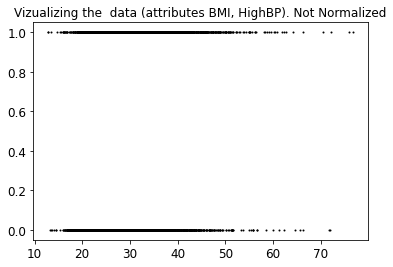

In [20]:
# separating the target column y = Diabetes before clustering

# for sampled dataset
X_sample_df = df_sample[X_columns].values
y_sample_df = df_sample[['Diabetes']]
plot_data(X_sample_df)
plt.title("Vizualizing the  data (attributes BMI, HighBP). Not Normalized")

Text(0.5, 1.0, 'Vizualizing the full data (attributes BMI, HighBP). Normalized')

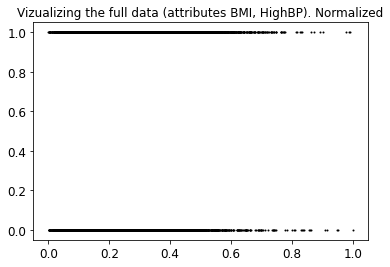

In [21]:
# Using minmax scaler for normalization
from sklearn.preprocessing import MinMaxScaler

# normalization full dataset
X_normalized = MinMaxScaler().fit(X_df).transform(X_df)
df_normalized = pd.DataFrame(X_normalized, columns=X_columns )
plot_data(X_normalized)
plt.title("Vizualizing the full data (attributes BMI, HighBP). Normalized")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 132646 to 192749
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Diabetes  10000 non-null  float64
dtypes: float64(1)
memory usage: 156.2 KB
None


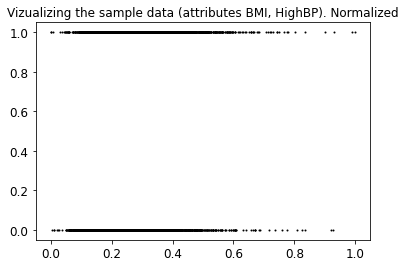

In [22]:
# normalization sample dataset
X_sample_normalized = MinMaxScaler().fit(X_sample_df).transform(X_sample_df)
df_sample_normalized = pd.DataFrame(X_sample_normalized, columns=X_columns )
plot_data(X_sample_normalized)
plt.title("Vizualizing the sample data (attributes BMI, HighBP). Normalized")


print(y_sample_df.info())

In [23]:
# Normalized features in pandas format
df_normalized.head()

,BMI,HighBP,HighChol,CholCheck,FruitConsume,VegetableConsume,Smoker,HeavyDrinker,Stroke,HeartDisease,...,NoDoctorDueToCost,PhysicalActivity,GeneralHealth,PhysicalHealth,MentalHealth,DifficultyWalking,Gender,Age,Education,Income
0,0.186505,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.50,0.500000,0.0,1.0,0.0,1.000000,0.4,0.285714
1,0.075433,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.25,0.333333,0.0,0.0,0.0,0.833333,0.8,0.571429
2,0.226298,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.50,0.000000,1.0,1.0,0.0,0.750000,1.0,0.857143
3,0.241984,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.75,1.000000,0.0,1.0,1.0,0.833333,1.0,0.857143
4,0.053633,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.666667,0.0,1.0,0.0,0.833333,0.2,0.285714


In [24]:
# Normalized features in numpy format
X_normalized

array([[0.18650519, 1.        , 1.        , ..., 1.        , 0.4       ,
        0.28571429],
       [0.07543253, 0.        , 0.        , ..., 0.83333333, 0.8       ,
        0.57142857],
       [0.22629758, 1.        , 0.        , ..., 0.75      , 1.        ,
        0.85714286],
       ...,
       [0.1905421 , 0.        , 0.        , ..., 0.5       , 0.4       ,
        0.        ],
       [0.227797  , 0.        , 1.        , ..., 0.        , 0.6       ,
        0.28571429],
       [0.09192618, 0.        , 0.        , ..., 0.33333333, 1.        ,
        1.        ]])

Note: The data pairs are as follows:
- Full Data
    1. X_df (pandas) with y_df(pandas) : not normalized full data set
    2. X_normalized (numpy) with y_df(pandas) : normalized full X in numpy (easy for clustering)
    3. df_normalized (pandas) with y_df(pandas) : normalized X in pandas format (easy for tracking feature names)
- Sample Data of 10,000 randomly selected rows
    1. X_sample_df (pandas) with y_sample_df(pandas) : not normalized sample data set
    2. X_df_normalized (numpy) with y_sample_df(pandas) : normalized sample X in numpy (easy for clustering)
    3. df_sample_normalized (pandas) with y_sample_df(pandas) : normalized X sample in pandas format (easy for tracking feature names)
    
- For all our clustering we will use only the normalized versions of the dataset.    

##  5. Feature Importance - With Decision Tree Classifier
- We are using Decision Tree Classifier to find which feature importance to see which features are having the highest.
- We will only be using normalized data. Since it will put all features in similar range.  
- We will be using tha full dataset as is . We will also we using the a balanced version of the dataset using undersampling technique to see if there is any change in the key features.

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [26]:
X = X_normalized
y_df['Diabetes']=y_df['Diabetes'].astype('int')
y = y_df.to_numpy()

In [27]:
# A simple training (1 training)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size=0.30)

#### Using Full Dataset As Is

Accuracy of DT classifier on training set: 1.00
Accuracy of DT classifier on test set: 0.79


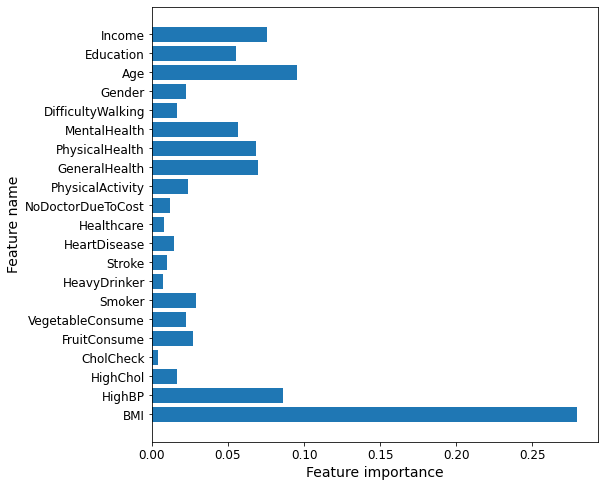

Feature importances: [0.27931751 0.08635461 0.01666336 0.00396084 0.02698384 0.02236237
 0.02883552 0.00744351 0.00987176 0.01420467 0.0082121  0.01204351
 0.02342647 0.06937859 0.06842486 0.05683353 0.01673057 0.02241037
 0.09529659 0.05551182 0.0757336 ]


In [28]:
clf = DecisionTreeClassifier(criterion='entropy').fit(X_train, y_train)

train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)

print('Accuracy of DT classifier on training set: {:.2f}'.format(train_score))
print('Accuracy of DT classifier on test set: {:.2f}'.format(test_score))

#plt.figure(figsize=(12,12), dpi=60)

# import features (call the function above)
plot_feature_importances(clf, df_normalized.columns)

plt.show()

print('Feature importances: {}'.format(clf.feature_importances_))

In [29]:
clf.score(X_test, y_test)

0.7932900432900433

In [30]:
y_pred = clf.predict(X_test)

#  confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
confusion_mat

array([[54468,  8045],
       [ 7044,  3439]], dtype=int64)

In [31]:
# Print classification report
target_names = ['Class 0', 'Class 1']

result_metrics = classification_report(y_test, y_pred, target_names=target_names)
print(result_metrics)

              precision    recall  f1-score   support

     Class 0       0.89      0.87      0.88     62513
     Class 1       0.30      0.33      0.31     10483

    accuracy                           0.79     72996
   macro avg       0.59      0.60      0.60     72996
weighted avg       0.80      0.79      0.80     72996



#### Doing with a Balanced Dataset 
- using random undersampler only on the training part  

In [32]:
# import RandomUndersampler
from imblearn.under_sampling import RandomUnderSampler

In [33]:
X_train.shape

(170321, 21)

In [34]:
under = RandomUnderSampler(sampling_strategy='auto')
X_train, y_train = under.fit_resample(X_train, y_train)

In [35]:
X_train.shape

(49632, 21)

In [36]:
unique, counts = np.unique(y_train, return_counts=True)
print ( np.asarray((unique, counts)).T)

[[    0 24816]
 [    1 24816]]


Accuracy of DT classifier on training set: 1.00
Accuracy of DT classifier on test set: 0.66


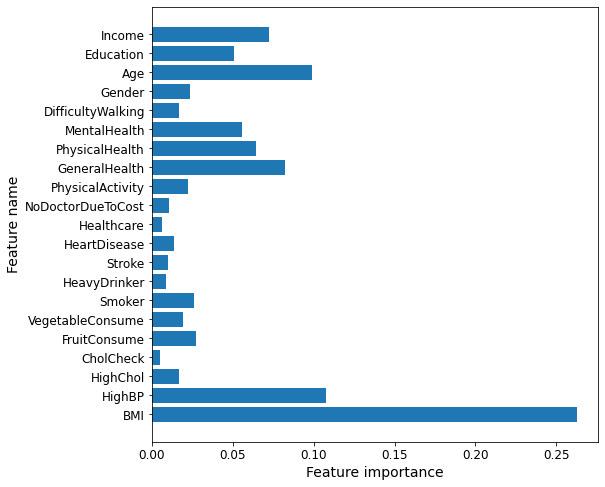

Feature importances: [0.26291005 0.10754319 0.01688605 0.00499179 0.02712826 0.01928236
 0.02616177 0.00840229 0.00992798 0.01337396 0.0062639  0.01041017
 0.02246018 0.0820788  0.06436261 0.05540956 0.01649228 0.02356799
 0.09920803 0.05057206 0.0725667 ]


In [37]:
clf = DecisionTreeClassifier(criterion='entropy').fit(X_train, y_train)

train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)

print('Accuracy of DT classifier on training set: {:.2f}'.format(train_score))
print('Accuracy of DT classifier on test set: {:.2f}'.format(test_score))

#plt.figure(figsize=(12,12), dpi=60)

# import features (call the function above)
plot_feature_importances(clf, df_normalized.columns)

plt.show()

print('Feature importances: {}'.format(clf.feature_importances_))

In [38]:
clf.score(X_test, y_test)

0.6602553564578881

In [39]:
y_pred = clf.predict(X_test)

#  confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
confusion_mat

array([[41328, 21185],
       [ 3615,  6868]], dtype=int64)

In [40]:
# Print classification report
target_names = ['Class 0', 'Class 1']

result_metrics = classification_report(y_test, y_pred, target_names=target_names)
print(result_metrics)

              precision    recall  f1-score   support

     Class 0       0.92      0.66      0.77     62513
     Class 1       0.24      0.66      0.36     10483

    accuracy                           0.66     72996
   macro avg       0.58      0.66      0.56     72996
weighted avg       0.82      0.66      0.71     72996



Note: Looking at at the feature importance we can bar plots for both the original dataset and the balanced data set we see that the following 8 features are very important  -  BMI, HighBP, General Health, Physical Health, Mental Health, Age , Education and Income.     

In [41]:
important_features = ['BMI','HighBP','GeneralHealth','PhysicalHealth','MentalHealth','Age','Education','Income']

## 5. Principle Component Analysis
- Using the only the most important features dicovered from the decision tree model we reduce the dimensionality to 2 

In [42]:
df_normalized.head()

,BMI,HighBP,HighChol,CholCheck,FruitConsume,VegetableConsume,Smoker,HeavyDrinker,Stroke,HeartDisease,...,NoDoctorDueToCost,PhysicalActivity,GeneralHealth,PhysicalHealth,MentalHealth,DifficultyWalking,Gender,Age,Education,Income
0,0.186505,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.50,0.500000,0.0,1.0,0.0,1.000000,0.4,0.285714
1,0.075433,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.25,0.333333,0.0,0.0,0.0,0.833333,0.8,0.571429
2,0.226298,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.50,0.000000,1.0,1.0,0.0,0.750000,1.0,0.857143
3,0.241984,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.75,1.000000,0.0,1.0,1.0,0.833333,1.0,0.857143
4,0.053633,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.666667,0.0,1.0,0.0,0.833333,0.2,0.285714


In [43]:
# Choose True if we are selecting only 8 top features for doing PCA else it will take entire data set
select_features = True

if(select_features==True):
    df_best_features = df_normalized[important_features]
else:
    df_best_features = df_normalized
df_best_features.head()

,BMI,HighBP,GeneralHealth,PhysicalHealth,MentalHealth,Age,Education,Income
0,0.186505,1.0,0.50,0.500000,0.0,1.000000,0.4,0.285714
1,0.075433,0.0,0.25,0.333333,0.0,0.833333,0.8,0.571429
2,0.226298,1.0,0.50,0.000000,1.0,0.750000,1.0,0.857143
3,0.241984,0.0,0.75,1.000000,0.0,0.833333,1.0,0.857143
4,0.053633,0.0,0.00,0.666667,0.0,0.833333,0.2,0.285714


In [44]:
# Dimesionality reduction to 2
from sklearn.decomposition import PCA

pca_model = PCA(n_components=2)
pca_model.fit(df_best_features) # fit the model
X_normalized_pca = pca_model.transform(df_best_features)
X_normalized_pca

array([[ 0.8143773 ,  0.21944804],
       [-0.1775784 ,  0.39799483],
       [ 0.57868681, -0.00386865],
       ...,
       [-0.3079835 ,  0.39221926],
       [-0.47663154,  0.34781812],
       [-0.51515748, -0.06059107]])

In [45]:
# numpy 
X_normalized_pca.shape

(243317, 2)

In [46]:
# pandafy it 
df_X_normalized_pca = pd.DataFrame(X_normalized_pca, columns=['Feature1','Feature2'] )
df_X_normalized_pca.head()

,Feature1,Feature2
0,0.814377,0.219448
1,-0.177578,0.397995
2,0.578687,-0.003869
3,-0.225108,0.374260
4,0.051858,0.924369


## 6. NAIVE BAYES CLASSIFIER
- For Naive Bayes Classfier we will use the reduced features generated by PCA and also undersample the majority class (to handle the imbalanced dataset) and classify the diabetics/non-diabetics
- We only undersample the training sets because the model needs to perform with naturally imbalanced data (ie less positive diabetes cases) we leave the test sets as they are.

#### Using PCA Reduced Features (2)

In [47]:
X = X_normalized_pca
y_df['Diabetes']=y_df['Diabetes'].astype('int')
y = y_df.to_numpy()

print(X.shape)

(243317, 2)


(53184, 2)
['#FFFFAA', '#EFEFEF']


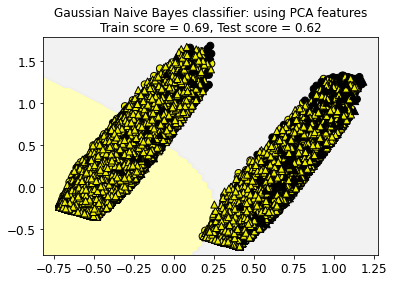

In [48]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# undersampling only on the Training sets 
under = RandomUnderSampler(sampling_strategy='auto')

X_train, y_train = under.fit_resample(X_train, y_train)
print(X_train.shape)

NBclf = GaussianNB().fit(X_train, y_train)

plot_class_regions_for_classifier(NBclf, X_train, y_train, X_test, y_test, 'Gaussian Naive Bayes classifier: using PCA features')

## Confusion Matrix

In [49]:
NBclf.score(X_test, y_test)

0.6205655104389282

In [50]:
y_pred = NBclf.predict(X_test)

#  confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

print(confusion_mat)

[[30913 21210]
 [ 1871  6836]]


## Classification Report:  Precision, Recall, F1-Score 

In [51]:
# Print classification report
target_names = ['Class 0', 'Class 1']

result_metrics = classification_report(y_test, y_pred, target_names=target_names)

print(result_metrics)

              precision    recall  f1-score   support

     Class 0       0.94      0.59      0.73     52123
     Class 1       0.24      0.79      0.37      8707

    accuracy                           0.62     60830
   macro avg       0.59      0.69      0.55     60830
weighted avg       0.84      0.62      0.68     60830



## ROC Curve

Accuracy =  0.7646406906055878


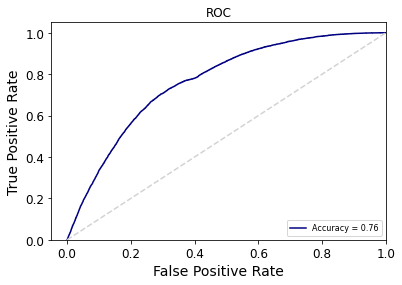

In [52]:
from sklearn.metrics import roc_curve, auc
y_score = NBclf.predict_proba(X_test)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_score[:,1])

roc_auc = auc(false_positive_rate, true_positive_rate)
print('Accuracy = ', roc_auc)

count = 1

# Get different color each graph line
colorSet = ['navy', 'greenyellow', 'deepskyblue', 'darkviolet', 'crimson', 
            'darkslategray', 'indigo', 'brown', 'orange', 'palevioletred', 'mediumseagreen',
            'k', 'darkgoldenrod', 'g', 'midnightblue', 'c', 'y', 'r', 'b', 'm', 'lawngreen'
            'mediumturquoise', 'lime', 'teal', 'drive', 'sienna', 'sandybrown']
color = colorSet[count-1]

# Plotting
plt.title('ROC')
plt.plot(false_positive_rate, true_positive_rate, c=color, label=('Accuracy = %0.2f'%roc_auc))
plt.legend(loc='lower right', prop={'size':8})
plt.plot([0,1],[0,1], color='lightgrey', linestyle='--')
plt.xlim([-0.05,1.0])
plt.ylim([0.0,1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Precision value for Class 1 is poor, recall score 0.79 for the same class is not bad. We plotted the ROC curve to compare the TPR vs FPR. Accuracy of 0.76 is not great but since Class 1 has very low precision, we will try and change the hyper parameters and see if the performance gets better.

#### Naive Bayes with undersampled data and StratifiedKFold using NB params var_smoothing

In [53]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

In [54]:
nb_classifier = GaussianNB()
skf = StratifiedKFold(n_splits=7)
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(estimator=nb_classifier, 
                 param_grid=params_NB, 
                 cv=skf,   # use any cross validation technique 
                 verbose=1, 
                 scoring='accuracy') 
gs_NB.fit(X_train, y_train)

gs_NB.best_params_

Fitting 7 folds for each of 100 candidates, totalling 700 fits


{'var_smoothing': 1.0}

['#FFFFAA', '#EFEFEF']


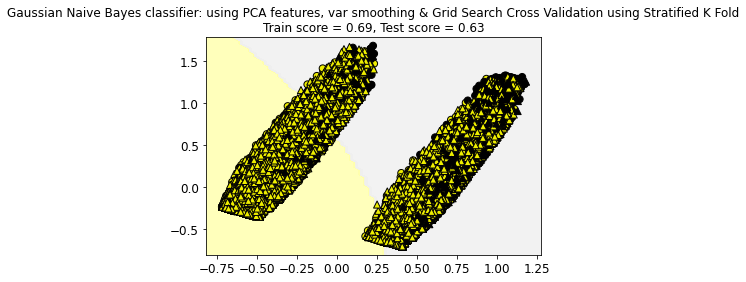

In [55]:
plot_class_regions_for_classifier(gs_NB, X_train, y_train, X_test, y_test, 'Gaussian Naive Bayes classifier: using PCA features, var smoothing & Grid Search Cross Validation using Stratified K Fold')

In [56]:
gs_NB.score(X_test, y_test)

0.6337333552523426

In [57]:
y_pred = gs_NB.predict(X_test)

#  confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

print(confusion_mat)

[[31836 20287]
 [ 1993  6714]]


## Classification Report:  Precision, Recall, F1-Score 

In [58]:
# Print classification report
target_names = ['Class 0', 'Class 1']

result_metrics = classification_report(y_test, y_pred, target_names=target_names)

print(result_metrics)

              precision    recall  f1-score   support

     Class 0       0.94      0.61      0.74     52123
     Class 1       0.25      0.77      0.38      8707

    accuracy                           0.63     60830
   macro avg       0.59      0.69      0.56     60830
weighted avg       0.84      0.63      0.69     60830



## ROC Curve

Accuracy =  0.7685176902887391


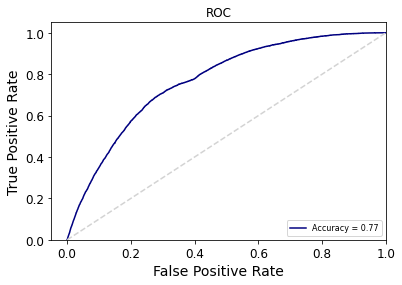

In [59]:
from sklearn.metrics import roc_curve, auc
y_score = gs_NB.predict_proba(X_test)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_score[:,1])

roc_auc = auc(false_positive_rate, true_positive_rate)
print('Accuracy = ', roc_auc)

count = 1

# Get different color each graph line
colorSet = ['navy', 'greenyellow', 'deepskyblue', 'darkviolet', 'crimson', 
            'darkslategray', 'indigo', 'brown', 'orange', 'palevioletred', 'mediumseagreen',
            'k', 'darkgoldenrod', 'g', 'midnightblue', 'c', 'y', 'r', 'b', 'm', 'lawngreen'
            'mediumturquoise', 'lime', 'teal', 'drive', 'sienna', 'sandybrown']
color = colorSet[count-1]

# Plotting
plt.title('ROC')
plt.plot(false_positive_rate, true_positive_rate, c=color, label=('Accuracy = %0.2f'%roc_auc))
plt.legend(loc='lower right', prop={'size':8})
plt.plot([0,1],[0,1], color='lightgrey', linestyle='--')
plt.xlim([-0.05,1.0])
plt.ylim([0.0,1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

The precision for class 1 improves marginally after changing the hyper parameters but the gain (0.01) is negligible. 
The ROC Curve looks very similar to NB without the hyper parameters change

# Conclusion

- In the beginning, we had 21 features not all of which are important to classify the diabetes dataset. 
- We first found the important features using the importances parameter of the DecisionTree Classifier. 
- We then performed Principal Component Analysis and reduced the dimensions to 2
- We then undersampled the majority class to handle the data imbalance problem
- On performing Gaussian Naive Bayes on this data, we got model score as 0.76 but the precision of the Class 1 was very low (0.24), even though the ROC was not bad.
- We changed hyper parameters of Gaussian Naive Bayes, i.e., Stratified K Fold = 7 and NB params var_smoothing
- The results did not improve a lot (only 0.01) which is not promising.

We plan to train few more classifiers and then draw a conclusion on the best classifiers for the dataset.

# End
## NEXT NOTEBOOK -> project_part_4_classification_NN (Neural Networks)